In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statistics as stat
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [7]:
p1=df['casual']+df['registered']
d1=df['datetime']
n1=len(d1)
s1=[];s2=[];s3=[]
date=[];time=[]
for i in range(n1):
    s1=d1[i]
    s2=s1[0:10]
    s3=s1[11:18]
    date=np.append(date,s2)
    time=np.append(time,s3)

In [6]:
df_date=pd.DataFrame(date)
df_date
df_time=pd.DataFrame(time)
df_time

,0
0,0:00:00
1,1:00:00
2,2:00:00
3,3:00:00
4,4:00:00
...,...
12975,20:00:0
12976,21:00:0
12977,22:00:0
12978,23:00:0


In [8]:
#exploratory data analysis


In [9]:
for col in df.columns:
    print(col)

datetime
season
holiday
workingday
weather
temp
atemp
humidity
windspeed
casual
registered
count


In [10]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


0    0.972496
1    0.027504
Name: holiday, dtype: float64


([<matplotlib.patches.Wedge at 0x1f561a97820>,
 [Text(-1.3449635999506377, 0.11650285321751076, 'holiday'),
  Text(1.3449636013141106, -0.11650283747693856, 'non_holiday')])

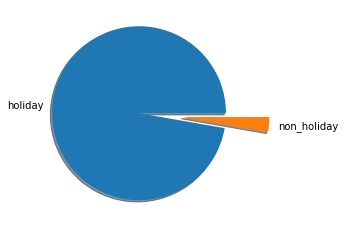

In [12]:
print(df['holiday'].value_counts()/len(df['holiday']))
r=pd.get_dummies(df['holiday'])
r1=(sum(r[0]),sum(r[1]))
plt.pie(r1,labels=["holiday","non_holiday"],shadow=True,explode=(.25,.25))

2    0.339676
1    0.306626
3    0.189291
4    0.164407
Name: season, dtype: float64


([<matplotlib.patches.Wedge at 0x1f5623ee760>,
 [Text(0.6849834818611573, 0.9852906320357288, 'spring'),
  Text(-1.186902383878412, 0.17681270074217714, 'summer'),
  Text(-0.0682164931447549, -1.198059476847052, 'rainy'),
  Text(1.0434641058363436, -0.5926066653617387, 'winter')])

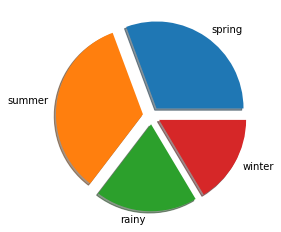

In [13]:
print(df['season'].value_counts()/len(df['season']))
r2=pd.get_dummies(df['season'])
r3=(sum(r2[1]),sum(r2[2]),sum(r2[3]),sum(r2[4]))
plt.pie(r3,labels=["spring","summer","rainy","winter"],shadow=True,explode=(.10,.10,.10,.10))

1    0.685978
0    0.314022
Name: workingday, dtype: float64


([<matplotlib.patches.Wedge at 0x1f562453070>,
 [Text(0.6343277885138389, 0.9592331607691337, 'workingday'),
  Text(-0.6343278783237262, -0.9592331013790757, 'non_workingday')])

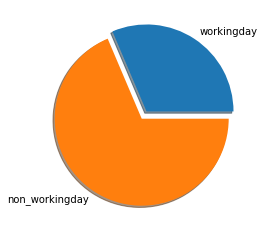

In [14]:
print(df['workingday'].value_counts()/len(df['workingday']))
r4=pd.get_dummies(df['workingday'])
r5=(sum(r4[0]),sum(r4[1]))
plt.pie(r5,labels=["workingday","non_workingday"],shadow=True,explode=(.05,.05))

In [15]:
#REGRESSION ANALYSIS

In [16]:
x=df[["holiday","workingday","weather","temp","humidity","windspeed"]]
y=df[["count"]]

In [17]:
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
x=stc.fit_transform(x)
y=stc.fit_transform(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [18]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

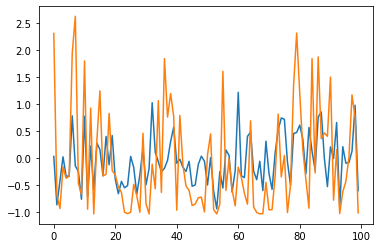

In [19]:
plt.plot(lreg.predict(x_train)[0:100])
plt.plot(y_train[0:100])

In [20]:
count=lreg.predict(x_train)
print(count)

[[ 0.02660644]
 [-0.86859924]
 [-0.42631669]
 ...
 [ 0.08332433]
 [-0.23817438]
 [ 0.2213713 ]]


In [21]:
sd=np.std(df["count"].values)
m=np.mean(df["count"].values)

In [22]:
a=[]
b=[]
for i in count:
    b=(i*sd)+m
    a=np.append(a,b)
print(a)

[171.85486974  27.9481442   99.04625555 ... 180.97242212 129.29063827
 203.16384498]


In [23]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error
mse(a,y_train)

35013.04207558246

In [24]:
n=24
pi=a
a1=y_train

In [25]:
#Root Mean Squared Logarithmic Error (RMSLE)
def RMSLE(num,y_pri,y_act):
    ms_error=np.sqrt((np.nansum((np.log(y_pri+1)-np.log(y_act+1))**2))/n)
    return ms_error
RMSLE(n,pi,a1)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12580/1885644836.py:3: RuntimeWarning: invalid value encountered in log
  ms_error=np.sqrt((np.nansum((np.log(y_pri+1)-np.log(y_act+1))**2))/n)


11646.323008204321